In [0]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]

194

In [6]:
train_images[4,20,20]

58

In [7]:
train_labels.shape

(60000,)

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_name=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

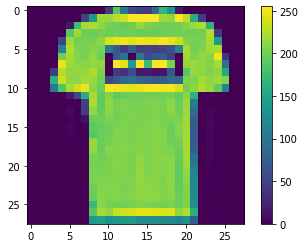

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #input layer
                          keras.layers.Dense(128, activation='relu'), #hidden layer
                          keras.layers.Dense(10, activation='softmax') #output layer
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [15]:
model.fit(train_images, train_labels, epoch=10)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4974 - accuracy: 0.8249


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy is: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8477
Test accuracy is:  0.8476999998092651


In [20]:
prediction = model.predict(test_images)
print(prediction)

[[7.8049539e-05 1.7397734e-06 6.1679852e-06 ... 1.6671991e-01
  8.6519942e-03 5.2691585e-01]
 [2.8587680e-04 1.6882645e-06 9.6174067e-01 ... 1.0127094e-11
  1.0481129e-05 7.0227582e-12]
 [2.0262300e-05 9.9991679e-01 5.4917955e-06 ... 1.0534119e-09
  1.4307082e-07 4.0576782e-11]
 ...
 [1.1079645e-01 3.0531512e-05 3.0854547e-03 ... 3.8799914e-04
  7.3683995e-01 3.1957286e-05]
 [5.2073674e-06 9.9784851e-01 5.3816102e-06 ... 4.9668836e-07
  1.3507366e-06 1.1937836e-07]
 [2.6324685e-04 1.8646810e-05 2.8202162e-04 ... 5.0547756e-02
  6.6343821e-03 5.3558731e-04]]


In [18]:
prediction[0]

array([7.8049539e-05, 1.7397734e-06, 6.1679852e-06, 5.5624719e-06,
       1.1138984e-05, 2.9751545e-01, 9.4059105e-05, 1.6671991e-01,
       8.6519942e-03, 5.2691585e-01], dtype=float32)

In [19]:
np.argmax(prediction[0])

9

In [21]:
test_labels[0]

9

Pick a number: 7


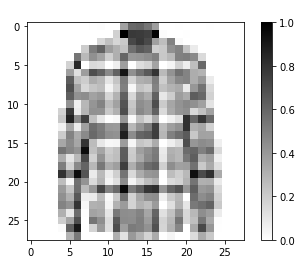

In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
